In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import mean_squared_error as mse 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from tensorflow import keras
from keras.models import Sequential,load_model
from keras.layers import *
from keras.callbacks import ModelCheckpoint
from keras.metrics import RootMeanSquaredError
from keras.optimizers import Adam

ModuleNotFoundError: No module named 'tensorflow'

In [4]:
housing_pd=pd.read_csv('Downloads/housing.csv')
housing_pd.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Downloads/housing.csv'

In [5]:
housing_pd['ocean_proximity'].value_counts()

NameError: name 'housing_pd' is not defined

In [4]:
housing_pd_shuffled=housing_pd.sample(n=len(housing_pd),random_state=1)
housing_pd_shuffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


In [5]:
pd.get_dummies(housing_pd_shuffled['ocean_proximity']).head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,1,0,0,0,0
2151,0,1,0,0,0
15927,0,0,0,1,0
82,0,0,0,1,0
8161,1,0,0,0,0


In [6]:
housing_pd_shuffled.drop('ocean_proximity',axis=1).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0


In [7]:
housing_pd_final=pd.concat([housing_pd_shuffled.drop('ocean_proximity',axis=1),
                            pd.get_dummies(housing_pd_shuffled['ocean_proximity'])],axis=1)

In [8]:
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,1,0,0,0,0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,0,1,0,0,0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,0,0,0,1,0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,0,0,0,1,0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,1,0,0,0,0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,1,0,0,0,0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,1,0,0,0,0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,0,1,0,0,0


In [9]:
housing_pd_final=housing_pd_final[['longitude',
                                   'latitude',
                                   'housing_median_age',
                                   'total_rooms',
                                   'total_bedrooms',
                                   'population',
                                   'households',
                                   'median_income',	'<1H OCEAN','INLAND',	'ISLAND',	'NEAR BAY',	'NEAR OCEAN','median_house_value']]
                                                                    

In [10]:
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,1,0,0,0,0,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,0,1,0,0,0,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,0,0,0,1,0,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,0,0,0,1,0,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,1,0,0,0,0,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,1,0,0,0,0,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,1,0,0,0,0,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,1,0,0,0,0,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,0,1,0,0,0,140700.0


In [11]:
housing_pd_final=housing_pd_final.dropna()

In [12]:
len(housing_pd_final)

20433

In [13]:
train_pd,test_pd,val_pd=housing_pd_final[:18000],housing_pd_final[18000:19215],housing_pd_final[19215:]
len(train_pd),len(test_pd),len(val_pd)

(18000, 1215, 1218)

In [14]:
x_train,y_train=train_pd.to_numpy()[:, :-1],train_pd.to_numpy()[:, -1]
x_test,y_test=test_pd.to_numpy()[:, :-1],test_pd.to_numpy()[:, -1]
x_val,y_val=val_pd.to_numpy()[:, :-1],val_pd.to_numpy()[:, -1]

In [15]:
x_train.shape,y_train.shape, x_test.shape , y_test.shape , x_val.shape , y_val.shape

((18000, 13), (18000,), (1215, 13), (1215,), (1218, 13), (1218,))

In [16]:
scaler=StandardScaler().fit(x_train[:, :8])

def preprocessor(X):
  A=np.copy(X)
  A[:, :8]=scaler.transform(A[:, :8])
  return A

x_train,x_test,x_val=preprocessor(x_train),preprocessor(x_test),preprocessor(x_val)

In [17]:
x_test.shape,x_train.shape,x_val.shape

((1215, 13), (18000, 13), (1218, 13))

In [18]:
pd.DataFrame(x_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.603443,-0.736073,0.820845,0.081039,0.315396,-0.276840,0.328234,-0.326667,1.0,0.0,0.0,0.0,0.0
1,-0.105122,0.537108,0.661774,-0.206526,-0.196843,-0.246809,-0.160526,-0.995001,0.0,1.0,0.0,0.0,0.0
2,-1.422454,0.981785,1.377592,-0.374924,-0.301674,0.098553,-0.244613,0.074459,0.0,0.0,0.0,1.0,0.0
3,-1.352596,1.019231,1.854804,-1.055419,-1.049782,-1.079740,-1.082862,-1.235508,0.0,0.0,0.0,1.0,0.0
4,0.718211,-0.848412,0.661774,-0.507894,-0.589957,-0.628385,-0.567825,0.687448,1.0,0.0,0.0,0.0,0.0


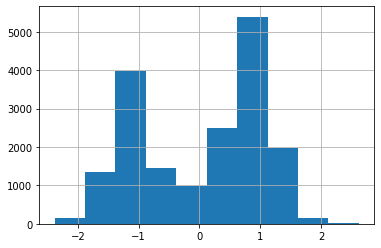

In [19]:
pd.DataFrame(x_train)[0].hist()

In [20]:
lm=LinearRegression().fit(x_train,y_train)
mse(lm.predict(x_train),y_train,squared=False),mse(lm.predict(x_val),y_val,squared=False)

(68593.05578127236, 71382.43558330165)

In [21]:
knn=KNeighborsRegressor(n_neighbors=10).fit(x_train,y_train)
mse(knn.predict(x_train),y_train,squared=False),mse(knn.predict(x_val),y_val,squared=False)

(53759.09908812057, 62161.22860469906)

In [22]:
rfr=RandomForestRegressor(max_depth=10).fit(x_train,y_train)
mse(rfr.predict(x_train),y_train,squared=False),mse(rfr.predict(x_val),y_val,squared=False)

(43516.04440951677, 53469.76217102408)

In [23]:
gbr=GradientBoostingRegressor(n_estimators=250).fit(x_train,y_train)
mse(gbr.predict(x_train),y_train,squared=False),mse(gbr.predict(x_val),y_val,squared=False)

(47274.82259072158, 51182.175976707775)

In [24]:
from keras import callbacks
from tensorflow.python import metrics
simple_nn=Sequential()

simple_nn.add(InputLayer((13,)))
simple_nn.add(Dense(2,'relu'))
simple_nn.add(Dense(1,'linear'))

opt= Adam(learning_rate=.1)

cp=ModelCheckpoint('models/simple_nn',save_best_only=True)

simple_nn.compile(optimizer=opt,loss='mse',metrics=[RootMeanSquaredError()])

simple_nn.fit(x=x_train,y=y_train,validation_data=(x_val,y_val),callbacks=[cp],epochs=100)

Epoch 1/100
563/563 [==============================] - 3s 3ms/step - loss: 50667094016.0000 - root_mean_squared_error: 225093.5156 - val_loss: 40760836096.0000 - val_root_mean_squared_error: 201893.1250
Epoch 2/100
563/563 [==============================] - 1s 2ms/step - loss: 28406585344.0000 - root_mean_squared_error: 168542.5312 - val_loss: 18419681280.0000 - val_root_mean_squared_error: 135719.1250
Epoch 3/100
563/563 [==============================] - 2s 3ms/step - loss: 13237617664.0000 - root_mean_squared_error: 115054.8438 - val_loss: 10094930944.0000 - val_root_mean_squared_error: 100473.5312
Epoch 4/100
563/563 [==============================] - 2s 3ms/step - loss: 8333647872.0000 - root_mean_squared_error: 91288.8125 - val_loss: 7433014272.0000 - val_root_mean_squared_error: 86214.9297
Epoch 5/100
563/563 [==============================] - 1s 2ms/step - loss: 6429237760.0000 - root_mean_squared_error: 80182.5312 - val_loss: 6215255040.0000 - val_root_mean_squared_error: 7883

In [25]:
simple_nn=load_model('models/simple_nn')
mse(simple_nn.predict(x_train),y_train,squared=False),mse(simple_nn.predict(x_val),y_val,squared=False)

39/39 [==============================] - 0s 1ms/step


(66316.15457143985, 68712.93843790895)

In [26]:
meduim_nn=Sequential()
meduim_nn.add(InputLayer((13,)))
meduim_nn.add(Dense(32,'relu'))
meduim_nn.add(Dense(16,'relu'))
meduim_nn.add(Dense(1,'linear'))

opt= Adam(learning_rate=.1)

cp=ModelCheckpoint('models/meduim_nn',save_best_only=True)

meduim_nn.compile(optimizer=opt,loss='mse',metrics=[RootMeanSquaredError()])

meduim_nn.fit(x=x_train,y=y_train,validation_data=(x_val,y_val),callbacks=[cp],epochs=100)

Epoch 1/100
563/563 [==============================] - 2s 3ms/step - loss: 8542441984.0000 - root_mean_squared_error: 92425.3281 - val_loss: 5019770368.0000 - val_root_mean_squared_error: 70850.3359
Epoch 2/100
563/563 [==============================] - 2s 3ms/step - loss: 4455992320.0000 - root_mean_squared_error: 66753.2188 - val_loss: 4801297920.0000 - val_root_mean_squared_error: 69291.3984
Epoch 3/100
563/563 [==============================] - 2s 3ms/step - loss: 4349654016.0000 - root_mean_squared_error: 65951.9062 - val_loss: 4574439936.0000 - val_root_mean_squared_error: 67634.6094
Epoch 4/100
563/563 [==============================] - 2s 4ms/step - loss: 4289447936.0000 - root_mean_squared_error: 65493.8789 - val_loss: 4471684608.0000 - val_root_mean_squared_error: 66870.6562
Epoch 5/100
563/563 [==============================] - 1s 2ms/step - loss: 4247933696.0000 - root_mean_squared_error: 65176.1758 - val_loss: 4517000704.0000 - val_root_mean_squared_error: 67208.6328
Epoch

In [27]:
meduim_nn=load_model('models/meduim_nn')
mse(meduim_nn.predict(x_train),y_train,squared=False),mse(meduim_nn.predict(x_val),y_val,squared=False)

39/39 [==============================] - 0s 2ms/step


(51734.38669347301, 56222.48526177467)

In [28]:
large_nn=Sequential()
large_nn.add(InputLayer((13,)))
large_nn.add(Dense(256,'relu'))
large_nn.add(Dense(128,'relu'))
large_nn.add(Dense(64,'relu'))
large_nn.add(Dense(32,'relu'))
large_nn.add(Dense(1,'linear'))

opt= Adam(learning_rate=.1)

cp=ModelCheckpoint('models/large_nn',save_best_only=True)

large_nn.compile(optimizer=opt,loss='mse',metrics=[RootMeanSquaredError()])

large_nn.fit(x=x_train,y=y_train,validation_data=(x_val,y_val),callbacks=[cp],epochs=100)

Epoch 1/100
563/563 [==============================] - 5s 5ms/step - loss: 6486609920.0000 - root_mean_squared_error: 80539.4922 - val_loss: 4728182784.0000 - val_root_mean_squared_error: 68761.7812
Epoch 2/100
563/563 [==============================] - 3s 5ms/step - loss: 4540686848.0000 - root_mean_squared_error: 67384.6172 - val_loss: 4621573120.0000 - val_root_mean_squared_error: 67982.1562
Epoch 3/100
563/563 [==============================] - 3s 5ms/step - loss: 4149921792.0000 - root_mean_squared_error: 64419.8867 - val_loss: 4141297152.0000 - val_root_mean_squared_error: 64352.9102
Epoch 4/100
563/563 [==============================] - 2s 3ms/step - loss: 3946972928.0000 - root_mean_squared_error: 62824.9375 - val_loss: 5536197120.0000 - val_root_mean_squared_error: 74405.6250
Epoch 5/100
563/563 [==============================] - 3s 5ms/step - loss: 3778981376.0000 - root_mean_squared_error: 61473.4219 - val_loss: 3845208576.0000 - val_root_mean_squared_error: 62009.7461
Epoch

In [29]:
large_nn=load_model('models/large_nn')
mse(large_nn.predict(x_train),y_train,squared=False),mse(large_nn.predict(x_val),y_val,squared=False)

39/39 [==============================] - 0s 2ms/step


(46277.42133927596, 53173.43606032754)

In [30]:
mse(gbr.predict(x_test),y_test,squared=False)

49421.046995816476